In [1]:
import tensorflow as tf

#tf.__version__ # Gives the version of the tensorflow library
#print(tf.version.VERSION)

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

# The idea is to feed through the pixel values to the neural network and have the neural network output the number in the image

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Above line unpacks the dataset to training and testing variables

x_train = tf.keras.utils.normalize(x_train, axis=1) # Scaling the data to values between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)
# Above process is not necessary but makes a significant difference

model = tf.keras.models.Sequential() # Sequential model
model.add(tf.keras.layers.Flatten()) # Images are multidimensional arrays before so we have to flatten it using the built-in
# layer in keras 

# Build a model usind 2 hidden layers 

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Using the dense layer with 128 units/neurons 
# Activation function is the stepper/sigmoid function that makes the neuron 'fire'
# tf.nn.relu(rectified linear) is the default activation function

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Another layer

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 
# The 10 units signify the no of classifications of the model i.e. 10 in this case  
# Activation function is not relu because the result is a probability distribution for which softmax is used

# Defining parameters for the training of the model
model.compile(optimizer='adam', # optimiser to be used 'adam' is commonly used
             loss='sparse_categorical_crossentropy',# degree of error since neural networks always try to min loss instead of max accuracy
             metrics=['accuracy']) # metrics we want to track

model.fit(x_train, y_train, epochs=3) # epochs is the number of times the network passes over the dataset

C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/3
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2604 - acc: 0.9247
Epoch 2/3
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1051 - acc: 0.9676
Epoch 3/3
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0741 - acc: 0.9772


In [2]:
# Calculate the validation loss and validation accuracy
# To check if the model has been overfit

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)


10000/10000 [==============================] - 1s 65us/sample - loss: 0.0987 - acc: 0.9695
0.09871041036942042 0.9695


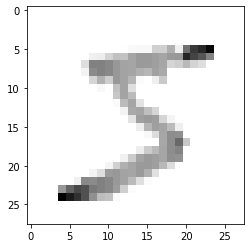

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary) # plt.imshow() displays the given data as an image plt.cm.binary will show it in b/w
# print(x_train[0]) # A multi-dimensional array is printed

In [4]:
tf.keras.datasets.mnist

<module 'tensorflow.python.keras.api._v1.keras.datasets.mnist' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\keras\\api\\_v1\\keras\\datasets\\mnist\\__init__.py'>

In [5]:
# Save a model
model.save('epic_num_reader.model')

In [6]:
# Load a model
new_model = tf.keras.models.load_model("epic_num_reader.model")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
import numpy as np 

predictions = new_model.predict(np.array(x_test))

In [7]:
predictions_new = new_model.predict(x_test) # Generates output predictions for the input samples.

7


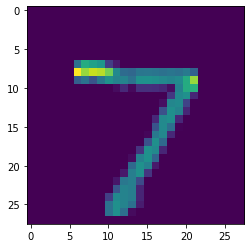

In [8]:
import numpy as np

print(np.argmax(predictions_new[0]))
plt.show(plt.imshow(x_test[0]))

In [9]:
help(new_model.predict)

Help on method predict in module tensorflow.python.keras.engine.training:

predict(x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Generates output predictions for the input samples.
    
    Computation is done in batches.
    
    Arguments:
        x: Input samples. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A `tf.data` dataset or a dataset iterator.
          - A generator or `keras.utils.Sequence` instance.
        batch_size: Integer or `None`.
            Number of samples per gradient update.
            If unspecified, `batch_size` will default to 32.
            Do not specify the `batch_size` is your data is in the
            form 

In [11]:
predictions = model.predict(x_test) # Predicting with the model
print(predictions) # Will print probability distributions

[[2.14762452e-09 7.22596525e-08 2.22132735e-06 ... 9.99983668e-01
  6.98000093e-08 1.29353978e-07]
 [2.74896109e-07 2.97359079e-02 9.69857395e-01 ... 1.18416015e-08
  5.75103841e-05 1.93287344e-10]
 [3.07462159e-07 9.99406219e-01 4.63393662e-05 ... 2.10358048e-04
  3.03984038e-04 3.43104011e-06]
 ...
 [1.77671691e-08 8.57002576e-08 1.45199408e-07 ... 1.64166049e-05
  5.92896822e-06 1.01595040e-04]
 [8.48571563e-06 1.58490423e-06 8.72186718e-07 ... 8.73284589e-05
  1.18268875e-03 2.35018138e-08]
 [4.91077742e-07 7.36244621e-10 2.15107239e-08 ... 3.52833700e-11
  1.47617826e-07 1.02296038e-09]]


In [12]:
predictions[0] # Gives an array of probabilities of each number being the number in the image index-wise. It is max at index 7.

array([2.14762452e-09, 7.22596525e-08, 2.22132735e-06, 1.37586085e-05,
       2.47610377e-10, 9.06514952e-09, 7.52548116e-14, 9.99983668e-01,
       6.98000093e-08, 1.29353978e-07], dtype=float32)

In [13]:
import numpy as np

print(np.argmax(predictions[0])) # Finding the prediction for x_test[0]
# np.argmax() method returns the index of the max value in an array

7


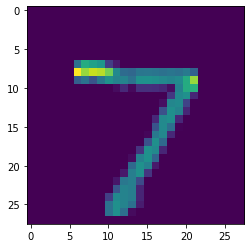

In [14]:
plt.imshow(x_test[0]) # Showing the x_test[0] image

In [16]:
tf.version.VERSION

'1.14.0'

In [17]:
len(predictions)

10000

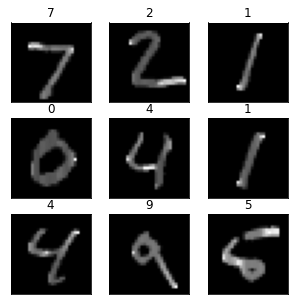

In [18]:
import numpy as np

titles = []

plt.subplots(3, 3, figsize=(5,5))

for i in range(9):
    titles.append(np.argmax(predictions[i]))
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# for i in range(10, 18):
#     print(np.argmax(predictions_new[i]))
#     plt.imshow(x_test[i])

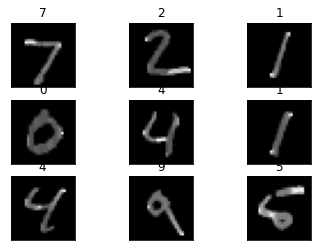

In [19]:
import numpy as np

titles = []

for i in range(9):
    titles.append(np.argmax(predictions_new[i]))
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [21]:
# import numpy as np

# titles = []

# for i in range(9):
#     titles.append(np.argmax(predictions[i]))
    
# print(titles)

# fig, axs = plt.subplots(3, 3)

# i=0
# for ax, interp in zip(axs, titles):
#     ax.imshow(x_test[i])
#     ax.set_title(titles)
#     i+=1
# # for i in range(9):
# #     titles.append(np.argmax(predictions[i]))
# #     axs[i].imshow(x_test[i])
# #     axs[i].set_title(titles[i])

In [31]:
# Trying to predict a random handwritten image using the trained model

# import cv2

# sample_img = cv2.imread("2.jpg", cv2.IMREAD_GRAYSCALE)
# sample_img = cv2.resize(sample_img, (28, 28))

In [32]:
# plt.imshow(sample_img)

In [29]:
# sample_prediction = model.predict(sample_img)

Object `sample_prediction = model.predict(sample_img)` not found.


In [33]:
# print(sample_predictions)

In [15]:
# Tutorial article link: https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/
# Video Link: https://youtu.be/wQ8BIBpya2k